### 1 Import relevant libraries

In [1]:
# import relevant libraries
import os # for file handling
import glob # for file handling
import csv # for reading the csv file
import numpy as np # for data manipulation
import pandas as pd # for data manipulation
import random # for shuffling the data and seed setting
import cv2 # read and save images
from PIL import Image # read and save images
from tqdm import tqdm # for progress bar
import matplotlib.pyplot as plt # for plotting

C:\Users\yileh\AppData\Local\Temp\ipykernel_19524\1674343332.py:6: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd # for data manipulation


### 2 Define relevant variables and paths

In [2]:
# define project path
project_path = 'c:/Users/yileh/OneDrive/msc_data_science/master_thesis'
 
# define the dataset path
dataset_path = 'c:/Users/yileh/OneDrive/msc_data_science/master_thesis/datasets_raw/FIVES'

# define FIVES quality assessment path
excel_path = 'c:/Users/yileh/OneDrive/msc_data_science/master_thesis/datasets_raw/FIVES/quality_assessment.xlsx'

# define where to store image information csv
image_information = 'c:/Users/yileh/OneDrive/msc_data_science/master_thesis/dataset.csv'

### 3 Explore the quality of the FIVES dataset

The FIVES dataset is initially split into train and test, so has two sheets which contain information about their quality (note that after aggregating all datasets, we split it into 3 parts: training, validation, and testing).

In [3]:
# read in the excel file containing the dataset quality of the FIVES dataset
# train part of the dataset
train_df = pd.read_excel(excel_path, sheet_name='Train', dtype={'Number': str})
# test part of the dataset
test_df = pd.read_excel(excel_path, sheet_name='Test', dtype={'Number': str})
# as both parts start from 1, the train and test part needs to be adjusted (adding _train and _test to the file names respectively)
train_df['Disease'] = train_df['Disease'] + '_train'
test_df['Disease'] = test_df['Disease'] + '_test'

In [4]:
# concatenate the two parts of the dataset
df = pd.concat([train_df, test_df], ignore_index=True)

In [5]:
# inspect first few rows of the dataframe
df.head()

Disease Number  IC  Blur  LC
0  A_train      1   1     1   1
1  A_train      2   1     1   1
2  A_train      3   1     1   1
3  A_train      4   1     1   1
4  A_train      5   1     1   1

In [6]:
# inspect last few rows of the dataframe
df.tail()

Disease Number  IC  Blur  LC
795  N_test    196   0     1   1
796  N_test    197   0     1   1
797  N_test    198   1     1   1
798  N_test    199   1     1   1
799  N_test    200   1     1   1

The dataset contains information about:
1. illumination and color distortion
2. blur
3. low contrast distortion.

Let's check for each case how the images look!

### 4 Explore these relevant issues visually

##### 4.1 Illumination and color distortion

In [7]:
# check how many pictures have illumination and color distortion issues

# illumination and color distortion, among other issues
ic = df[df['IC']==0]
print(f'Amount of pictures with illumination and color distortion: {ic['IC'].value_counts()[0]}')

# illumination and color distortion, no other issues
only_ic = df[(df['IC']==0) & (df['Blur']==1) & (df['LC']==1)]
print(f'Amount of pictures with illumination and color distortion where other issues are not apparent: {only_ic['IC'].value_counts()[0]}')

Amount of pictures with illumination and color distortion: 156
Amount of pictures with illumination and color distortion where other issues are not apparent: 76


In [8]:
# set seed for reproducibility
random.seed(42)

# get three random images with illumination and color distortion issues
sample = only_ic.sample(5)

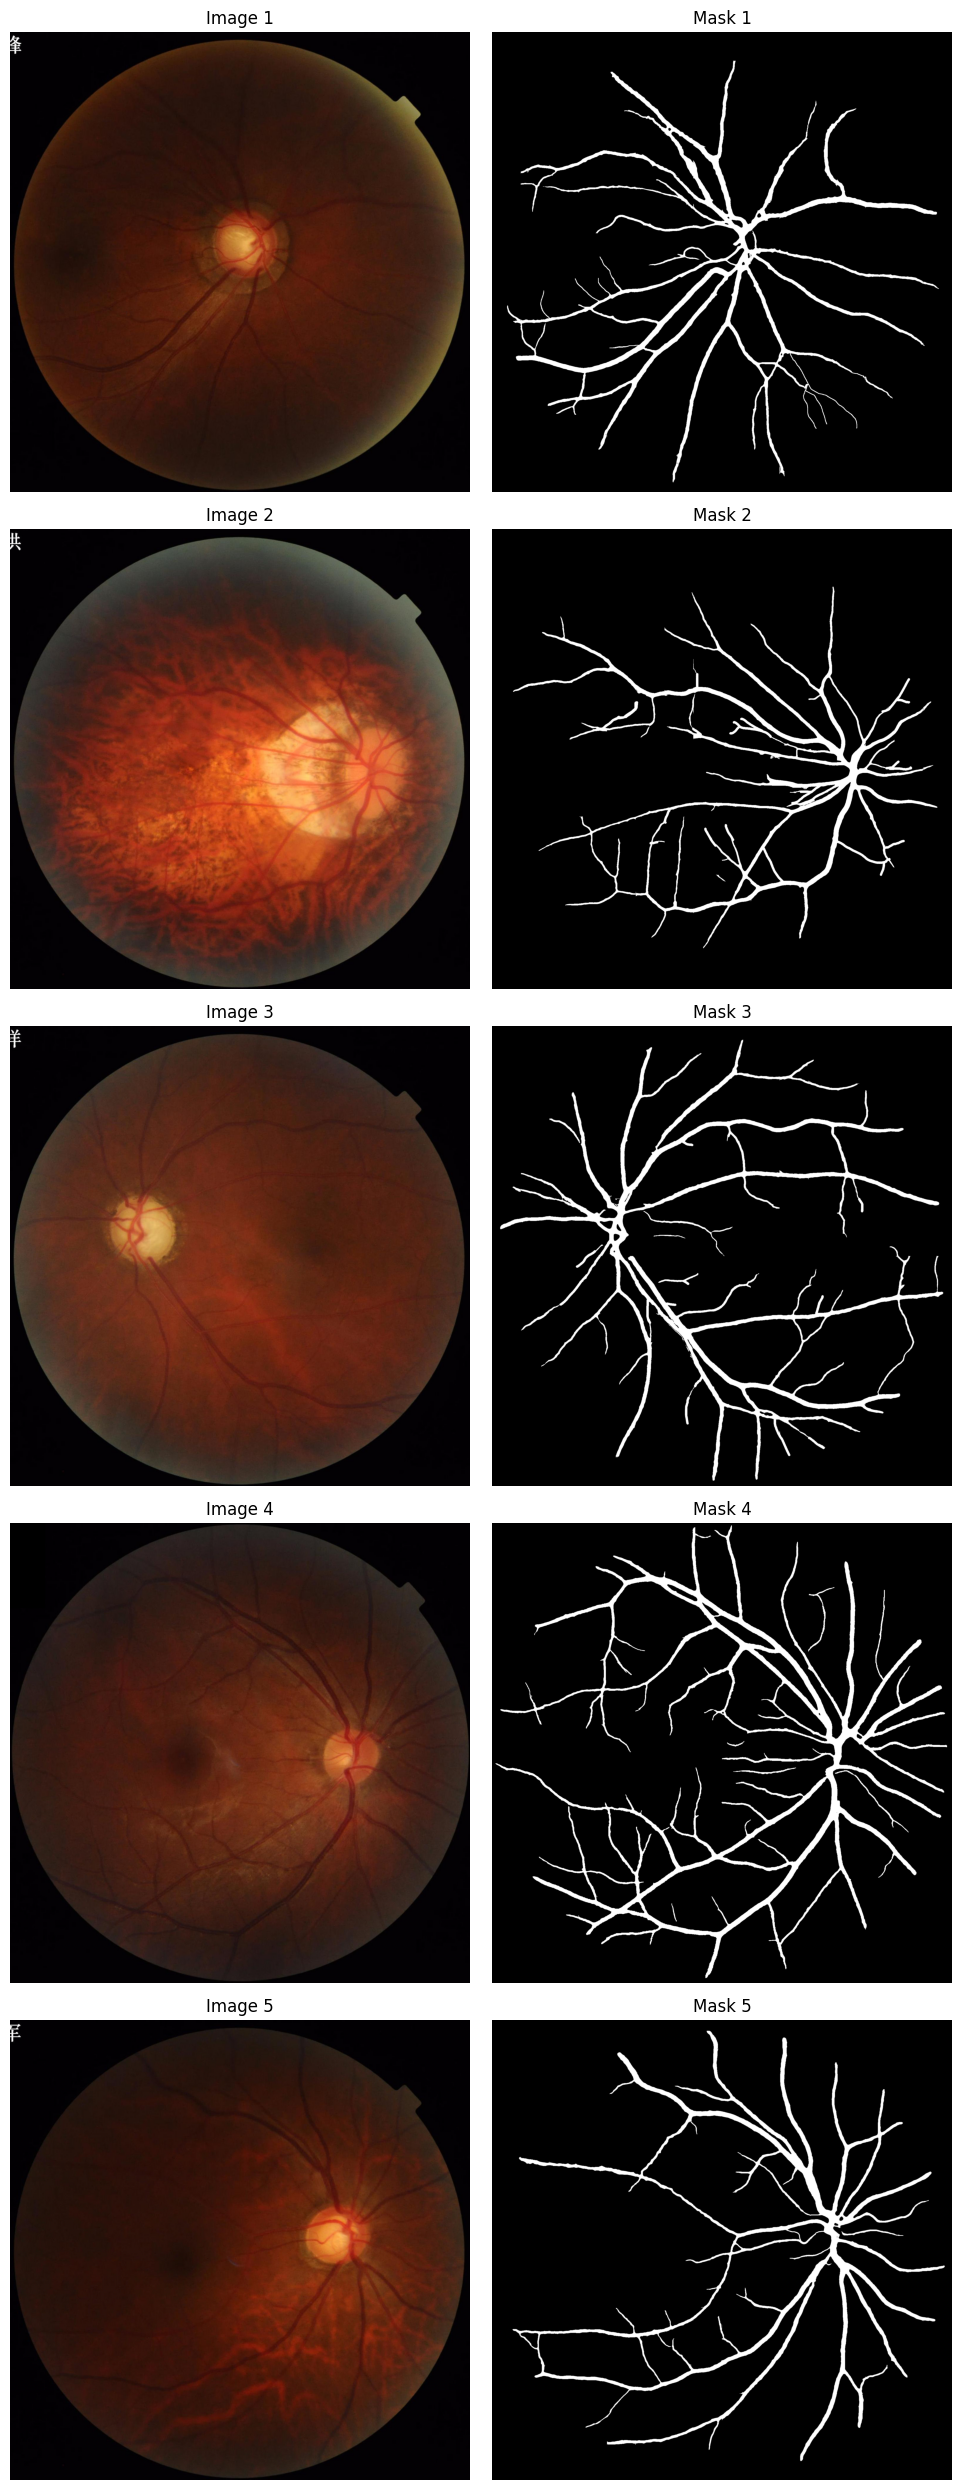

In [9]:
# create figure with subplots for each image-mask pair
fig, axes = plt.subplots(len(sample), 2, figsize=(10, 5*len(sample)))

# iterate over sample dataframe
for i, (_, row) in enumerate(sample.iterrows()):
    # load and display image
    image_path = os.path.join(dataset_path, 'images', f"{row['Number']}_{row['Disease']}.png")
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    axes[i, 0].imshow(image)
    axes[i, 0].set_title(f'Image {i+1}')
    axes[i, 0].axis('off')
    
    # load and display mask
    mask_path = os.path.join(dataset_path, 'masks', f"{row['Number']}_{row['Disease']}.png")
    mask = cv2.imread(mask_path)
    axes[i, 1].imshow(mask)
    axes[i, 1].set_title(f'Mask {i+1}')
    axes[i, 1].axis('off')

# adjust spacing between subplots
plt.tight_layout()

# show the images and masks
plt.show()

There seems no problem with images and masks categorized with illumination and color distortion issues, the blood vessels are well apparent!

##### 4.2 Blur

In [10]:
# check how many pictures have blur issues

# blur, among other issues
blur = df[df['Blur']==0]
print(f'Amount of pictures with blur: {blur['Blur'].value_counts()[0]}')

# blur, no other issues
only_blur = df[(df['IC']==1) & (df['Blur']==0) & (df['LC']==1)]
print(f'Amount of pictures with blur where other issues are not apparent: {only_blur['Blur'].value_counts()[0]}')

Amount of pictures with blur: 131
Amount of pictures with blur where other issues are not apparent: 51


In [11]:
# set seed for reproducibility
random.seed(42)

# get three random images with blur issues
sample = only_blur.sample(5)

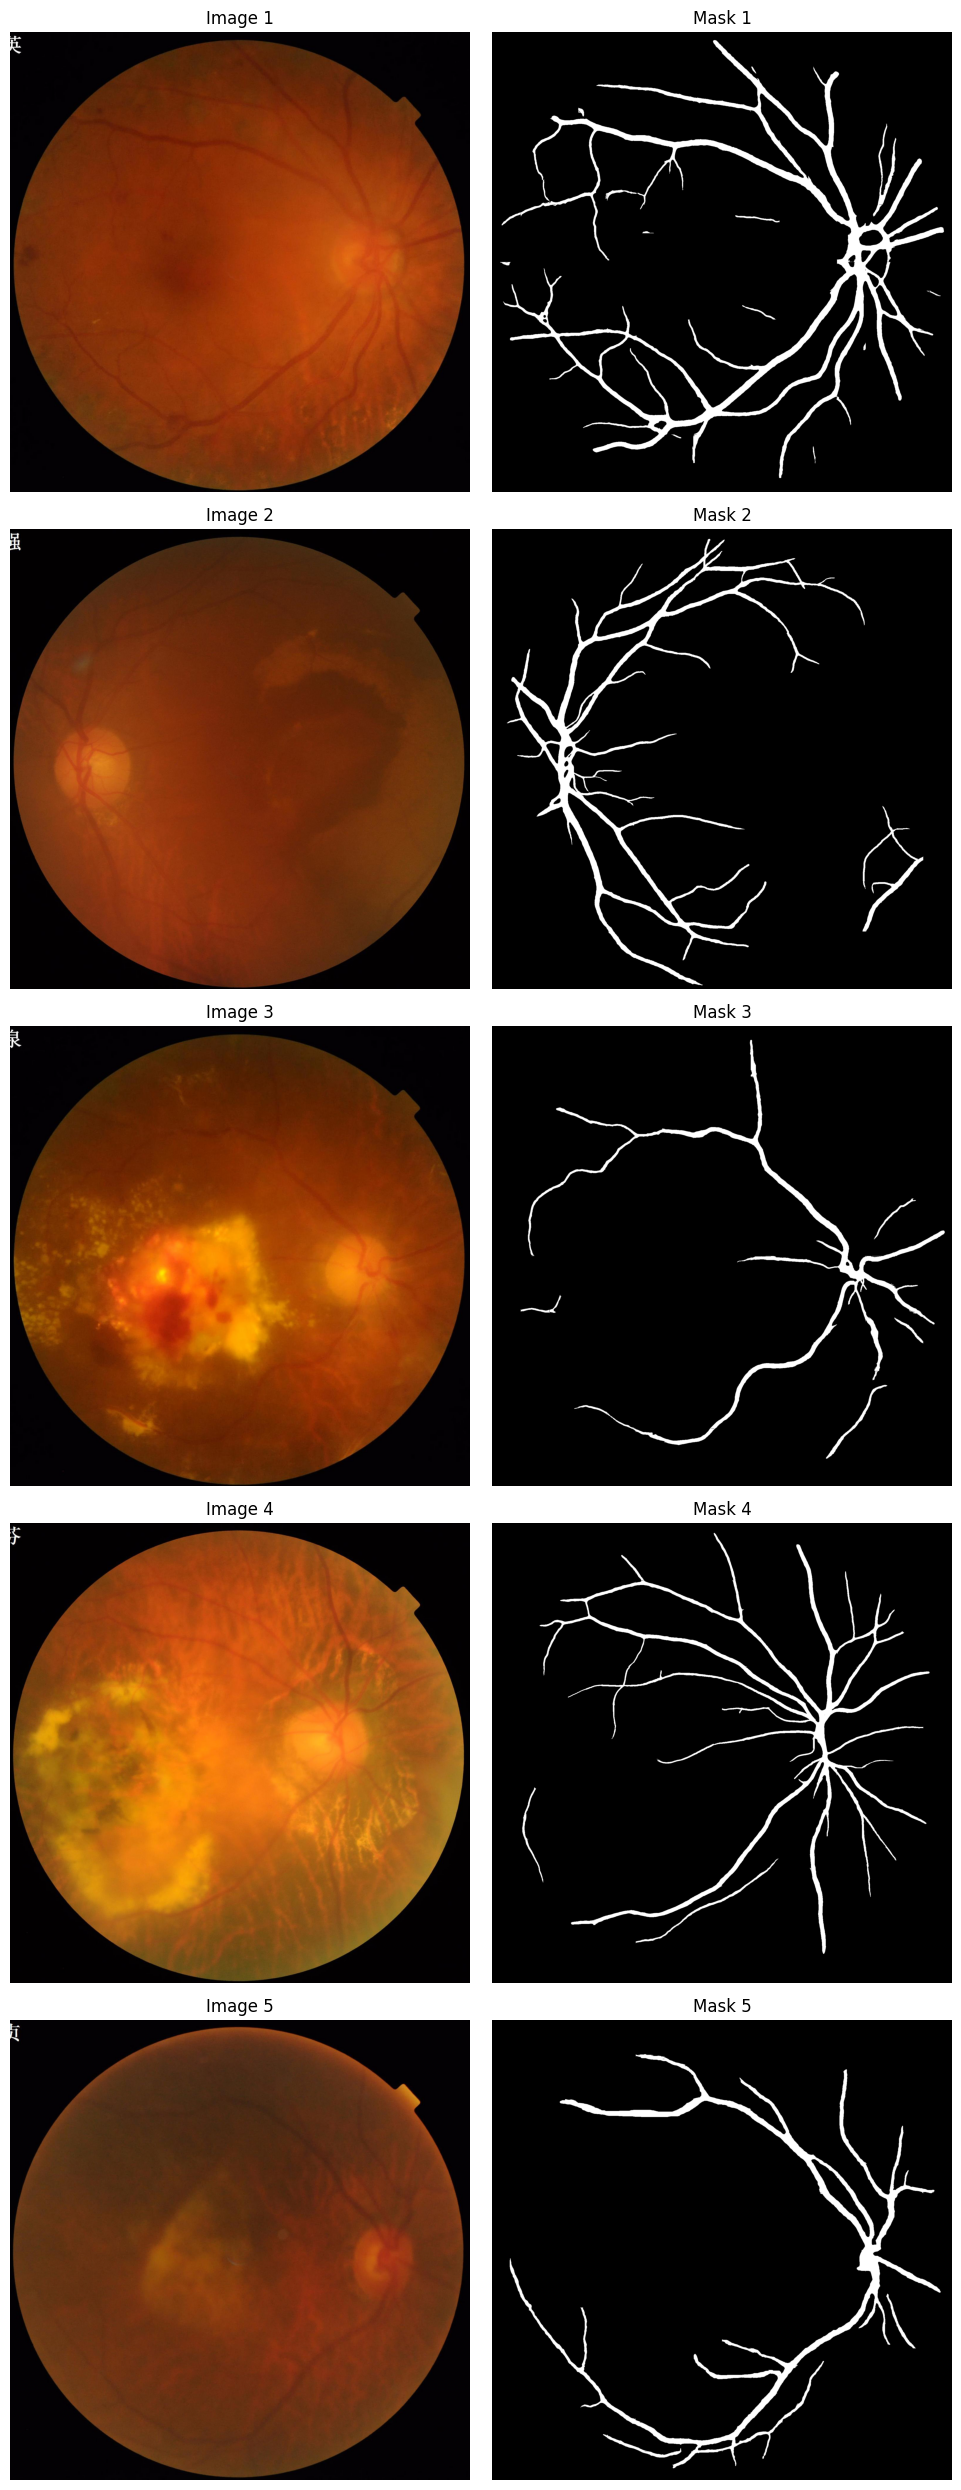

In [12]:
# create figure with subplots for each image-mask pair
fig, axes = plt.subplots(len(sample), 2, figsize=(10, 5*len(sample)))

# iterate over sample dataframe
for i, (_, row) in enumerate(sample.iterrows()):
    # load and display image
    image_path = os.path.join(dataset_path, 'images', f"{row['Number']}_{row['Disease']}.png")
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    axes[i, 0].imshow(image)
    axes[i, 0].set_title(f'Image {i+1}')
    axes[i, 0].axis('off')
    
    # load and display mask
    mask_path = os.path.join(dataset_path, 'masks', f"{row['Number']}_{row['Disease']}.png")
    mask = cv2.imread(mask_path)
    axes[i, 1].imshow(mask)
    axes[i, 1].set_title(f'Mask {i+1}')
    axes[i, 1].axis('off')

# adjust spacing between subplots
plt.tight_layout()

# show the images and masks
plt.show()

There seems that blurred images and masks have some issues as the blood vessels are well apparent, however, the visibility is not as clear anymore!

##### 4.3 Low contrast distortion

In [13]:
# check how many pictures have low contrast distortion issues

# low contrast distortion, among other issues
lc = df[df['LC']==0]
print(f'Amount of pictures with low contrast: {lc['LC'].value_counts()[0]}')

# only low contrast distortion, no other issues
only_lc = df[(df['IC']==1) & (df['Blur']==1) & (df['LC']==0)]
if not only_lc['LC'].value_counts().empty:
    # if there are images with low contrast distortion, print the amount
    print(f'Amount of pictures with low contrast distortion where other issues are not apparent: {lc['LC'].value_counts()[0]}')
else:
    # if there are no images with low contrast distortion, print that there are none
    print('No pictures with low contrast distortion where other issues are not apparent found.')

Amount of pictures with low contrast: 35
No pictures with low contrast distortion where other issues are not apparent found.


In [14]:
# get three random images with blur issues
sample = lc.sample(5)

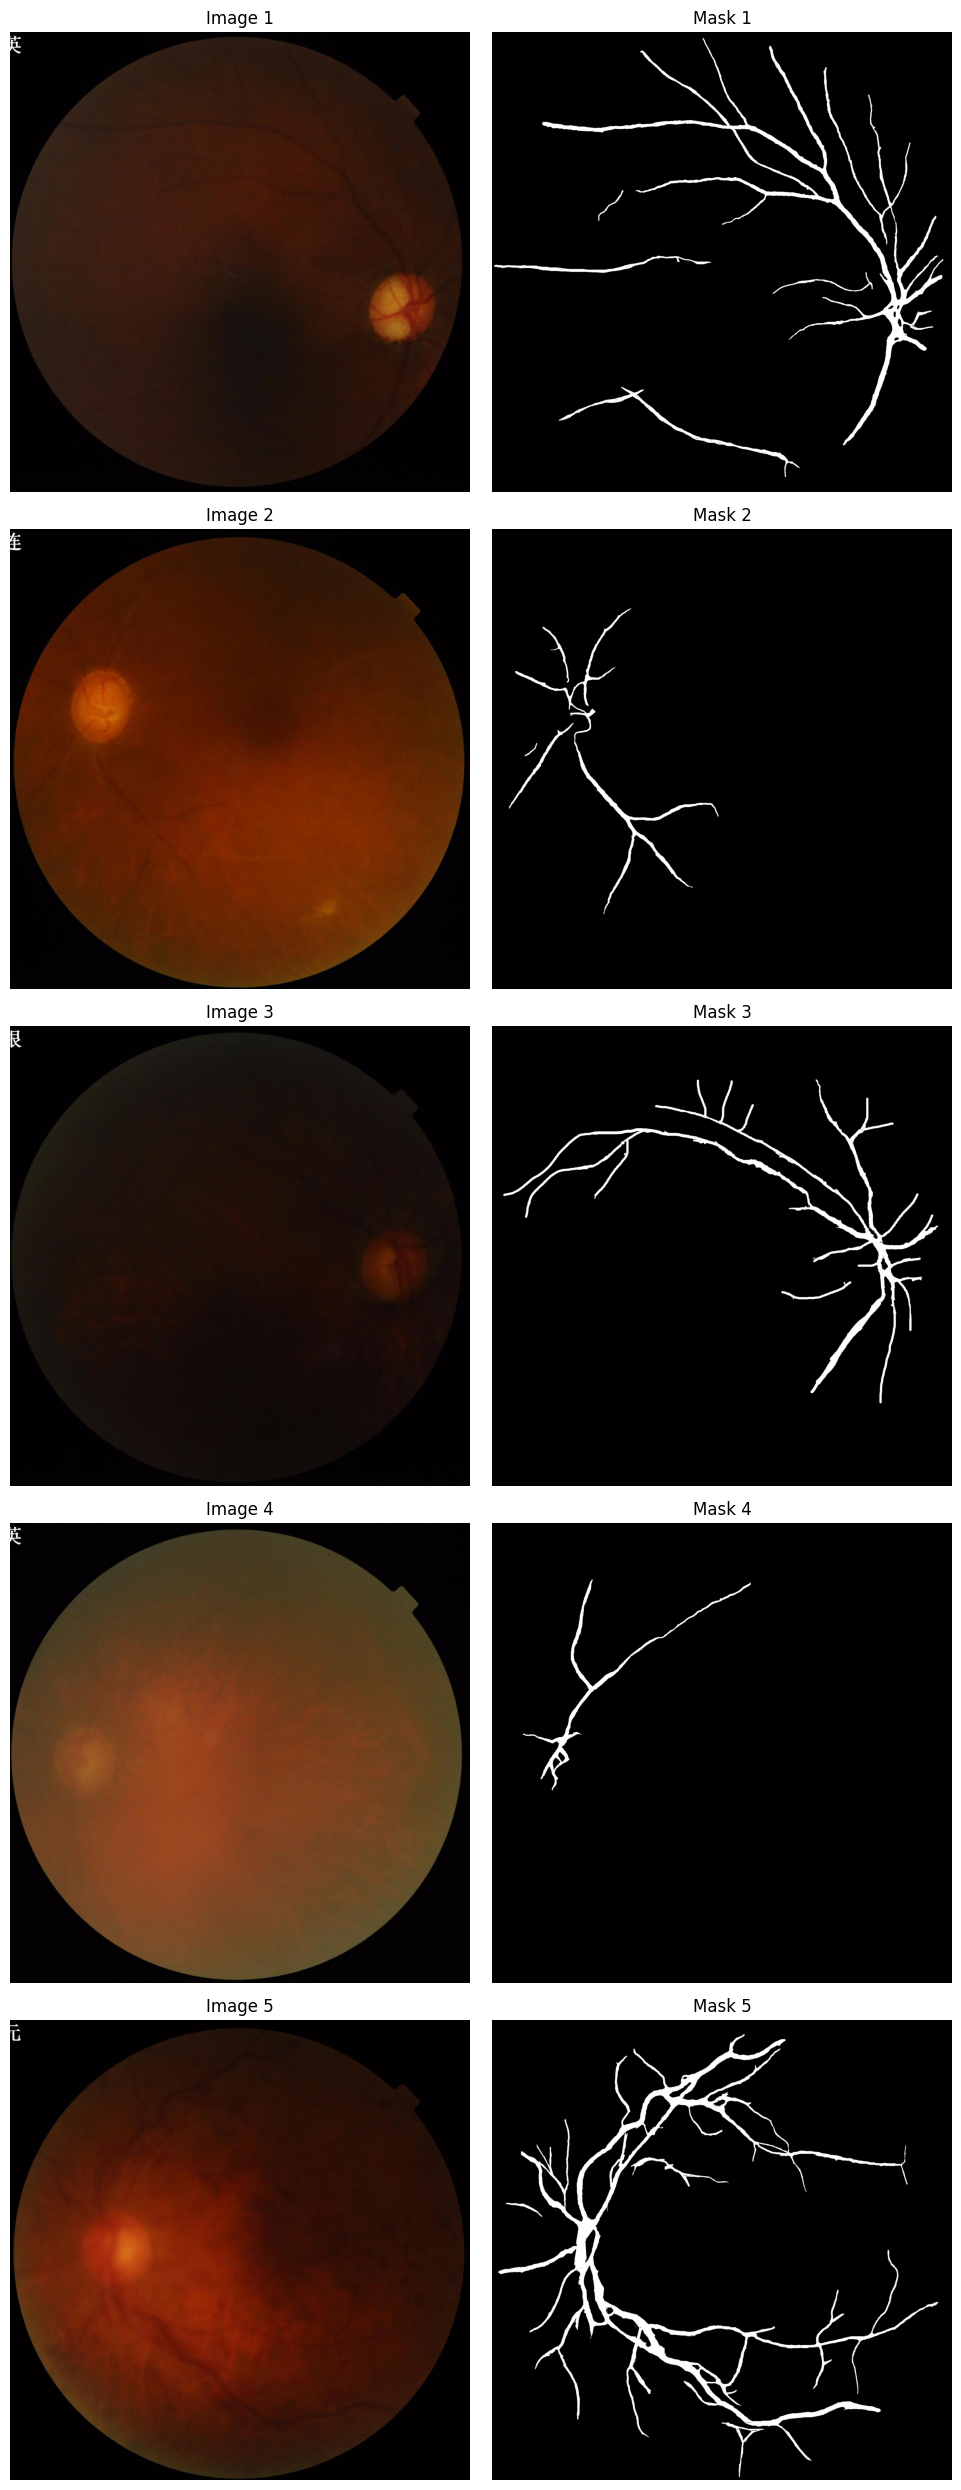

In [15]:
# create figure with subplots for each image-mask pair
fig, axes = plt.subplots(len(sample), 2, figsize=(10, 5*len(sample)))

# iterate over sample dataframe
for i, (_, row) in enumerate(sample.iterrows()):
    # load and display image
    image_path = os.path.join(dataset_path, 'images', f"{row['Number']}_{row['Disease']}.png")
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    axes[i, 0].imshow(image)
    axes[i, 0].set_title(f'Image {i+1}')
    axes[i, 0].axis('off')
    
    # load and display mask
    mask_path = os.path.join(dataset_path, 'masks', f"{row['Number']}_{row['Disease']}.png")
    mask = cv2.imread(mask_path)
    axes[i, 1].imshow(mask)
    axes[i, 1].set_title(f'Mask {i+1}')
    axes[i, 1].axis('off')

# adjust spacing between subplots
plt.tight_layout()

# show the images and masks
plt.show()

There seems that low contrast images and masks have major issues as the blood vessels are not apparent at all!

##### 4.4 Check for empty masks

In [16]:
# list for storing empty mask file names
empty_masks = []

# iterate over all mask files and identify empty masks
for mask_file_path in tqdm(glob.glob(os.path.join(dataset_path, 'masks', '*.png'))):
    mask = cv2.imread(mask_file_path, cv2.IMREAD_GRAYSCALE)
    if np.sum(mask)==0:
        # if the sum of the mask is 0, the mask is empty
        # append that file to the list
        empty_masks.append(mask_file_path.split('\\')[-1])

100%|██████████| 800/800 [00:22<00:00, 35.18it/s]


In [17]:
# count the amount of empty masks
print(f'Amount of empty masks: {len(empty_masks)}')

Amount of empty masks: 2


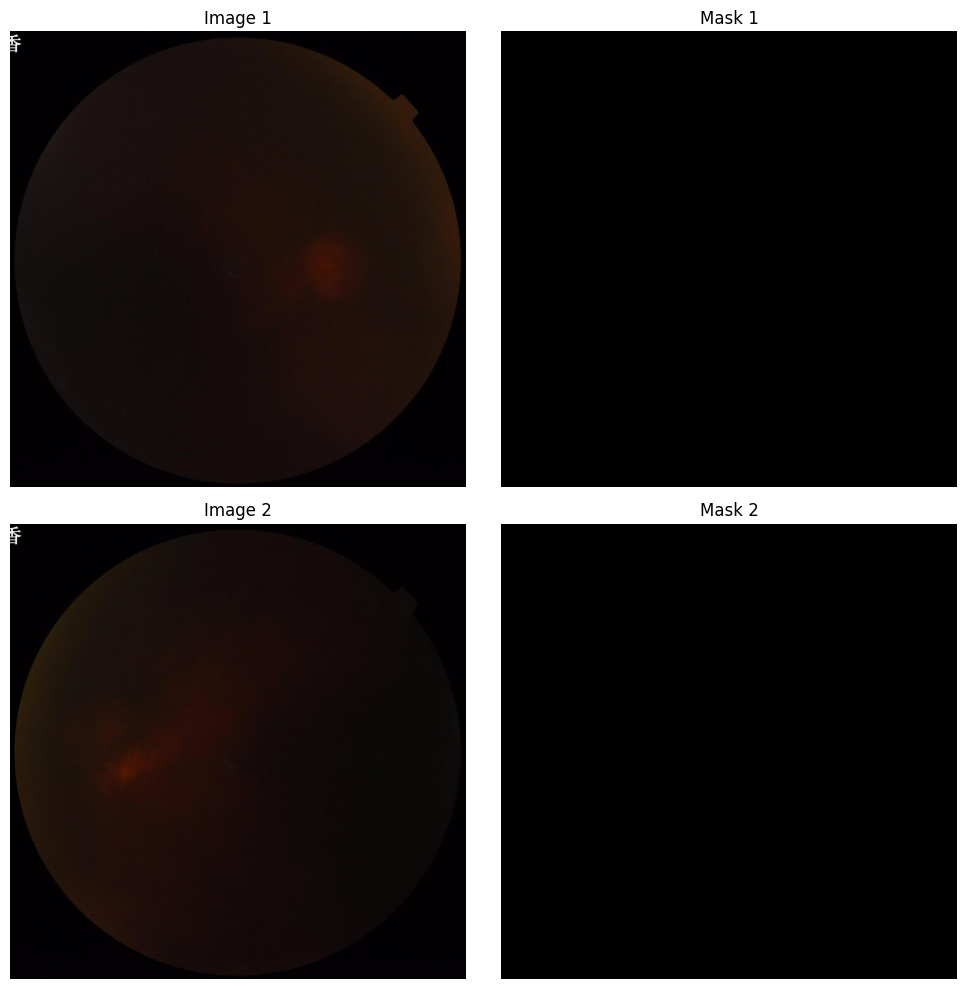

In [18]:
# depict the empty masks and their image counterparts

# create figure with subplots for each image-mask pair
fig, axes = plt.subplots(len(empty_masks), 2, figsize=(10, 5*len(empty_masks)))

# iterate over empty_masks list
for i, mask_file in enumerate(empty_masks):
    # load and display image
    image_path = os.path.join(dataset_path, 'images', mask_file)
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    axes[i, 0].imshow(image)
    axes[i, 0].set_title(f'Image {i+1}')
    axes[i, 0].axis('off')
    
    # load and display mask
    mask_path = os.path.join(dataset_path, 'masks', mask_file)
    mask = cv2.imread(mask_path)
    axes[i, 1].imshow(mask)
    axes[i, 1].set_title(f'Mask {i+1}')
    axes[i, 1].axis('off')

# adjust spacing between subplots
plt.tight_layout()

# show the images and masks
plt.show()

These two empty mask images have major issues as the blood vessels are not apparent at all! They are therefore also not relevant for our final dataset!

### 5 Filter the images with issues

After careful inspection of the image quality of the FIVES dataset, the decision to remove images with blur and images with low contrast distortion as well with empty masks is a consequent step!

##### 5.1 Get all IDs

In [19]:
# check how many pictures have at least one issue (blur or low contrast distortion) in total
images_with_issues = df[((df['Blur'] == 0) | (df['LC'] == 0))]
print(f'Amount of pictures with at least one issue (blur or low contrast distortion): {images_with_issues.shape[0]}')

Amount of pictures with at least one issue (blur or low contrast distortion): 132


In [20]:
# list for storing file names that need to be removed from the final dataset
images_with_issues = []

# get all file names where at least one issue is present
for _, row in df.iterrows():
    if row['Blur'] == 0 or row['LC'] == 0:
        images_with_issues.append(row['Number'] + '_' + row['Disease'] + '.png')
        
# add also the file names with empty masks
images_with_issues.extend(empty_masks)
# remove duplicates
images_with_issues = list(set(images_with_issues))

# count the amount of images to remove from final dataset
print(f'Amount of images to remove from the final dataset: {len(images_with_issues)}')


Amount of images to remove from the final dataset: 132


132 images have to be removed from final dataset. The masks where already included at first filter step as the amount did not increase after adding the empty mask files.

In [21]:
# save the images to be removed in a text file
with open(os.path.join(project_path, 'images_to_remove.txt'), 'w') as f:
    for item in images_with_issues:
        f.write("%s\n" % item)

### 6 Demonstrate preprocessing steps on images for U-Net

The preprocessing of the images in the file ***03_train_test_split.ipynb*** and integrated in a large loop to create training, validation, and testing set. The steps follow recent papers that examined which preprocessing steps have demonstrated extraordinary results in image segmentation:
- Wave-Net: A lightweight deep network for retinal vessel segmentation from fundus images (Liu et al. 2023).

In [22]:
# demonstrate the preprocessing steps
sample = df.iloc[0:1]
file_name = sample['Number'].values[0] + '_' + sample['Disease'].values[0] + '.png'

In [23]:
# save parameters for preprocessing

# new image size
height = 1024
width = 1024

# for contrast-limited adaptive histogram equalization (CLAHE)
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))

# for gamma correction
gamma = 1.2

# some images of the FIVES dataset have top-left a white Chinese sign (needs to be removed so that contrast increases afer normalization)
# for specification of Chinese sign that needs to be blacked
x_start, y_start, x_end, y_end = 0, 0, 300, 300

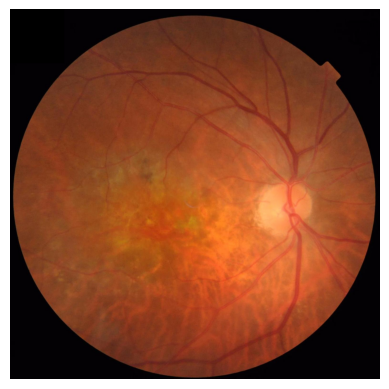

In [24]:
# take a random sample to demonstrate preprocessing
image_1 = cv2.imread(os.path.join(dataset_path, 'images', file_name))

# # convert the Chinese sign on the top-left to black pixels
image_1[y_start:y_end, x_start:x_end] = 0

# display the image
plt.imshow(cv2.cvtColor(image_1, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

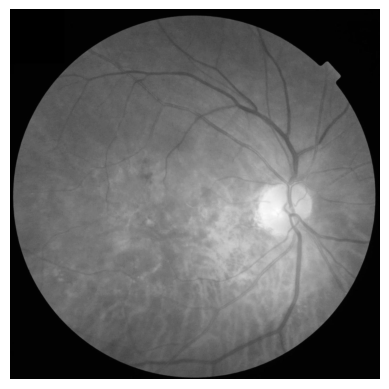

In [25]:
# convert to grayscale
image_2 = cv2.cvtColor(image_1, cv2.COLOR_BGR2GRAY)

# display the image
plt.imshow(image_2, cmap='gray')
plt.axis('off')
plt.show()

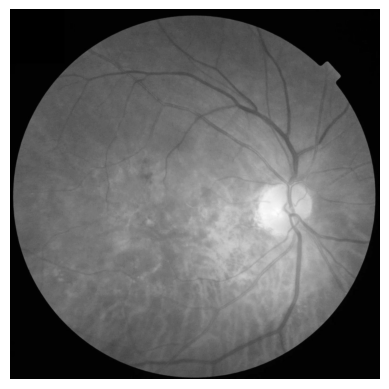

In [26]:
# image normalization (min=0, max=255)
# image normalization increases the range of the values in the image
image_3 = cv2.normalize(image_2, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX)

# display the image
plt.imshow(image_3, cmap='gray')
plt.axis('off')
plt.show()

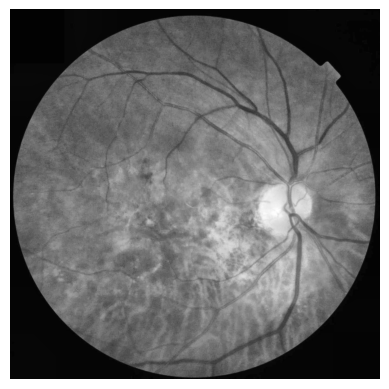

In [27]:
# use contrast-limited adaptive histogram equalization (CLAHE)
# increases the contrast of the image
image_4 = clahe.apply(image_3)

# display the image
plt.imshow(image_4, cmap='gray')
plt.axis('off')
plt.show()

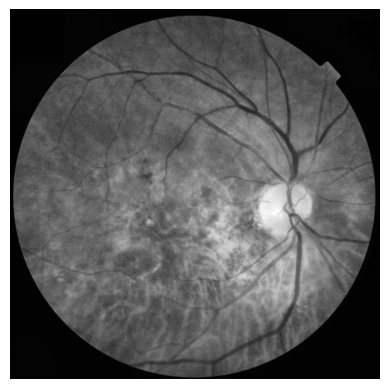

In [28]:
# use gamma correction
image_5 = np.array(255*(image_4 / 255) ** gamma, dtype='uint8')

# display the image
plt.imshow(image_5, cmap='gray')
plt.axis('off')
plt.show()

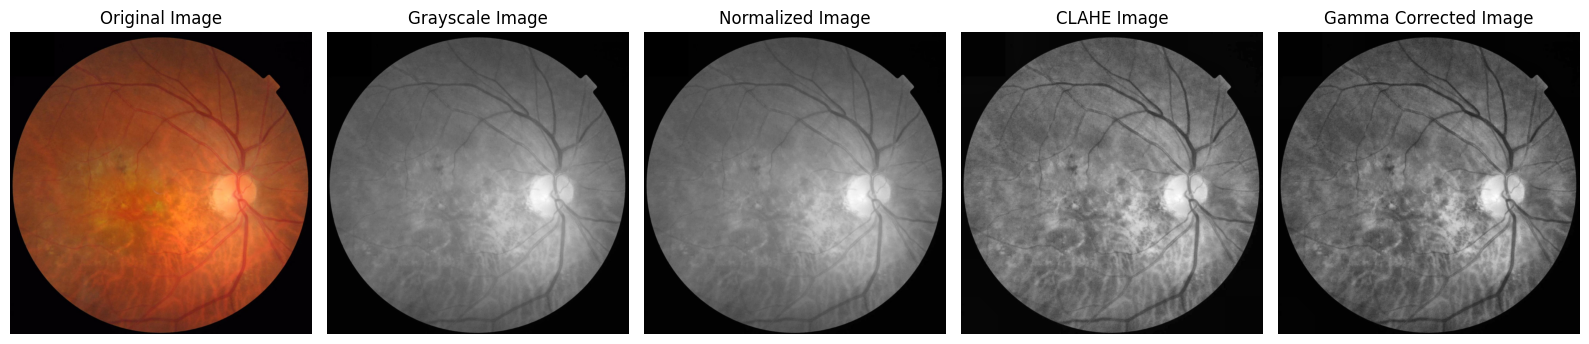

In [29]:
# display all five images in a row
fig, axes = plt.subplots(1, 5, figsize=(16, 4))

# display the original image
axes[0].imshow(cv2.cvtColor(image_1, cv2.COLOR_BGR2RGB))
axes[0].set_title('Original Image')
axes[0].axis('off')

# display the grayscale image
axes[1].imshow(image_2, cmap='gray')
axes[1].set_title('Grayscale Image')
axes[1].axis('off')

# display the normalized image
axes[2].imshow(image_3, cmap='gray')
axes[2].set_title('Normalized Image')
axes[2].axis('off')

# display the CLAHE image
axes[3].imshow(image_4, cmap='gray')
axes[3].set_title('CLAHE Image')
axes[3].axis('off')

# display the gamma corrected image
axes[4].imshow(image_5, cmap='gray')
axes[4].set_title('Gamma Corrected Image')
axes[4].axis('off')

# adjust spacing between subplots
plt.tight_layout()

# show the images
plt.show()

### 7 Demonstrate preprocessing steps on images for SAM

The preprocessing of the images in the file ***03_train_test_split.ipynb*** and integrated in a large loop to create training, validation, and testing set. The steps follow recent papers that examined which preprocessing steps have demonstrated extraordinary results in image segmentation:
- Wave-Net: A lightweight deep network for retinal vessel segmentation from fundus images (Liu et al. 2023).

In [30]:
# demonstrate the preprocessing steps
sample = df.iloc[0:1]
file_name = sample['Number'].values[0] + '_' + sample['Disease'].values[0] + '.png'

In [31]:
# save parameters for preprocessing

# new image size
height = 1024
width = 1024

# for contrast-limited adaptive histogram equalization (CLAHE)
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))

# for gamma correction
gamma = 1.2

# some images of the FIVES dataset have top-left a white Chinese sign (needs to be removed so that contrast increases afer normalization)
# for specification of Chinese sign that needs to be blacked
x_start, y_start, x_end, y_end = 0, 0, 300, 300

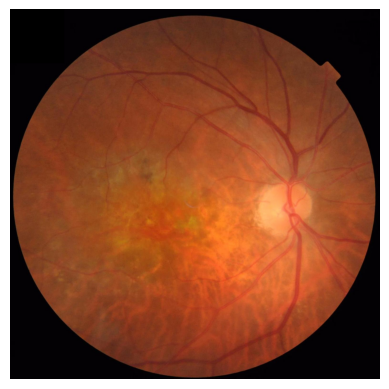

In [32]:
# take a random sample to demonstrate preprocessing
image_1 = cv2.imread(os.path.join(dataset_path, 'images', file_name))

# # convert the Chinese sign on the top-left to black pixels
image_1[y_start:y_end, x_start:x_end] = 0

# display the image
plt.imshow(cv2.cvtColor(image_1, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

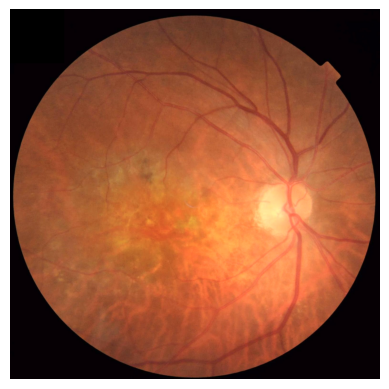

In [33]:
# image normalization (min=0, max=255)
# image normalization increases the range of the values in the image

# convert image to LAB color space
lab_image = cv2.cvtColor(image_1, cv2.COLOR_BGR2LAB)

# split the LAB image into channels
l_channel, a_channel, b_channel = cv2.split(lab_image)

# apply normalization to the L channel
l_channel = cv2.normalize(l_channel, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX)

# marge CLAHE-enhanced L channel with original A and B channels
lab_image = cv2.merge((l_channel, a_channel, b_channel))

# convert LAB image back to RGB color space
image_2 = cv2.cvtColor(lab_image, cv2.COLOR_LAB2BGR)
    
# display the image
plt.imshow(cv2.cvtColor(image_2, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

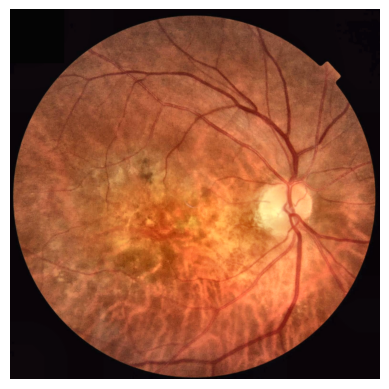

In [34]:
# use contrast-limited adaptive histogram equalization (CLAHE)
# increases the contrast of the image

# convert image to LAB color space
lab_image = cv2.cvtColor(image_2, cv2.COLOR_BGR2LAB)

# split the LAB image into channels
l_channel, a_channel, b_channel = cv2.split(lab_image)

# apply CLAHE to the L channel
l_channel = clahe.apply(l_channel)

# marge CLAHE-enhanced L channel with original A and B channels
lab_image = cv2.merge((l_channel, a_channel, b_channel))

# convert LAB image back to RGB color space
image_3 = cv2.cvtColor(lab_image, cv2.COLOR_LAB2BGR)
    
# display the image
plt.imshow(cv2.cvtColor(image_3, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

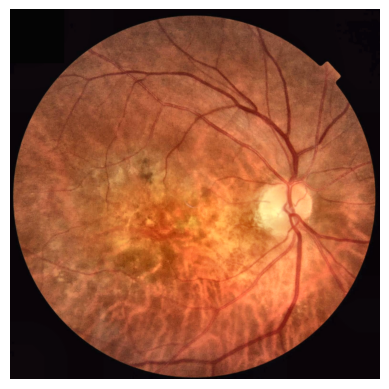

In [35]:
# use gamma correction
# increases the contrast of the image

# convert image to LAB color space
lab_image = cv2.cvtColor(image_2, cv2.COLOR_BGR2LAB)

# Split the LAB image into channels
l_channel, a_channel, b_channel = cv2.split(lab_image)

# apply gamma correction
l_channel = np.uint8(((l_channel / 255.0) ** gamma) * 255)

# merge gamma-corrected L channel with original A and B channels
lab_image = cv2.merge((l_channel, a_channel, b_channel))

# convert LAB image back to RGB color space
image_4 = cv2.cvtColor(lab_image, cv2.COLOR_LAB2BGR)

# display the image
plt.imshow(cv2.cvtColor(image_3, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

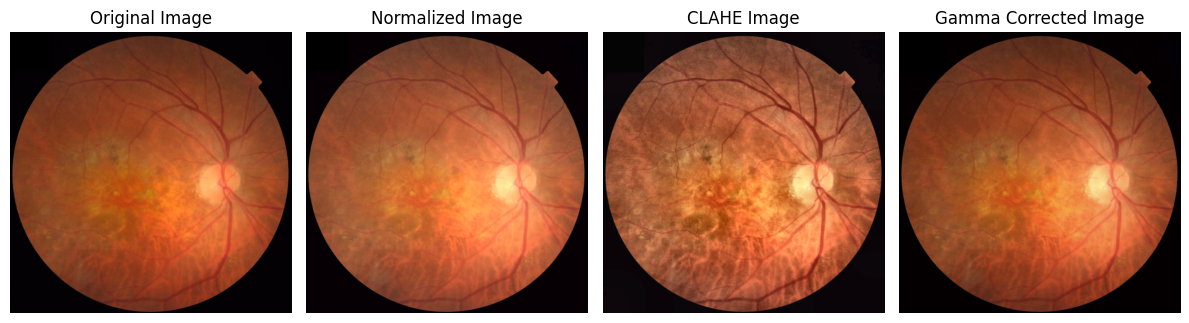

In [36]:
# display all five images in a row
fig, axes = plt.subplots(1, 4, figsize=(12, 4))

# display the original image
axes[0].imshow(cv2.cvtColor(image_1, cv2.COLOR_BGR2RGB))
axes[0].set_title('Original Image')
axes[0].axis('off')

# display the CLAHE image
axes[1].imshow(cv2.cvtColor(image_2, cv2.COLOR_BGR2RGB))
axes[1].set_title('Normalized Image')
axes[1].axis('off')

# display the CLAHE image
axes[2].imshow(cv2.cvtColor(image_3, cv2.COLOR_BGR2RGB))
axes[2].set_title('CLAHE Image')
axes[2].axis('off')

# display the gamma corrected image
axes[3].imshow(cv2.cvtColor(image_4, cv2.COLOR_BGR2RGB))
axes[3].set_title('Gamma Corrected Image')
axes[3].axis('off')

# adjust spacing between subplots
plt.tight_layout()

# show the images
plt.show()

### 8 Check amount of class imbalance in segmentation masks

This part checks the class imbalance of vessel pixels for each dataset and across all datasets after cleaning for images that needed to be removed. The **dataset_indexing.csv** is the output of **02.indexing.ipynb** where all datasets and their images are stored.

In [37]:
# open csv file with information about the images and masks
df = pd.read_csv(os.path.join(project_path, 'dataset_indexing.csv'))

In [38]:
# inspect head of the dataframe
df.head()

dataset_name file_name_image       file_name_mask  ID
0     CHASEDB1   Image_01L.jpg  Image_01L_1stHO.png   1
1     CHASEDB1   Image_01R.jpg  Image_01R_1stHO.png   2
2     CHASEDB1   Image_02L.jpg  Image_02L_1stHO.png   3
3     CHASEDB1   Image_02R.jpg  Image_02R_1stHO.png   4
4     CHASEDB1   Image_03L.jpg  Image_03L_1stHO.png   5

In [39]:
# get all dataset names
df['dataset_name'].unique()

array(['CHASEDB1', 'DRIVE', 'FIVES', 'HRF'], dtype=object)

In [40]:
# empty dictionary for storing the percentage of vessel pixels per mask
vessel_dict = {}

# loop through the first dataset and get the percentage of vessel pixels in percent per mask
for dataset_name in tqdm(df['dataset_name'].unique()):
    # get all masks for the dataset
    masks = df[df['dataset_name']==dataset_name]['file_name_mask']
    # loop through all masks
    for mask in masks:
        # read in the mask as PIL with mode '1' (binary)
        mask = np.array(Image.open(os.path.join(project_path, 'datasets_raw', dataset_name, 'masks', mask)).convert('1'))
        # calculate the percentage of vessel pixels
        vessel_pixels = np.sum(mask==1)
        total_pixels = mask.shape[0] * mask.shape[1]
        percentage = (vessel_pixels / total_pixels)
        # add the percentage to the corresponding key (dataset name)
        if dataset_name in vessel_dict:
            vessel_dict[dataset_name].append(round(percentage,4))
        else:
            vessel_dict[dataset_name] = [percentage]

100%|██████████| 4/4 [00:54<00:00, 13.62s/it]


In [41]:
# calculate mean, median, standard deviation, min and max of the percentage of vessel pixels per mask and how many masks there are per dataset rounded by 4 decimals
vessel_dict_mean = {key: round(np.mean(value),4) for key, value in vessel_dict.items()}
vessel_dict_median = {key: round(np.median(value),4) for key, value in vessel_dict.items()}
vessel_dict_std = {key: round(np.std(value),4) for key, value in vessel_dict.items()}
vessel_dict_min = {key: round(np.min(value),4) for key, value in vessel_dict.items()}
vessel_dict_max = {key: round(np.max(value),4) for key, value in vessel_dict.items()}
vessel_dict_count = {key: len(value) for key, value in vessel_dict.items()}

# create a dataframe with the mean, median, standard deviation, min and max of the percentage of vessel pixels per mask
vessel_df = pd.DataFrame([vessel_dict_mean, vessel_dict_median, vessel_dict_std, vessel_dict_min, vessel_dict_max, vessel_dict_count]).T

# add column names
vessel_df.columns = ['Mean', 'Median', 'Standard Deviation', 'Min', 'Max', 'Count']

In [42]:
# inspect the dataframe
vessel_df

Mean  Median  Standard Deviation     Min     Max  Count
CHASEDB1  0.0693  0.0728              0.0097  0.0506  0.0852   28.0
DRIVE     0.0869  0.0863              0.0107  0.0603  0.1159   40.0
FIVES     0.0795  0.0818              0.0131  0.0309  0.1106  668.0
HRF       0.0771  0.0752              0.0140  0.0509  0.1056   45.0

In [43]:
# calculate the same statistics across all datasets
vessel_dict_all = {key: value for key, value in vessel_dict.items()}
vessel_dict_all_mean = np.mean([item for sublist in vessel_dict_all.values() for item in sublist])
vessel_dict_all_median = np.median([item for sublist in vessel_dict_all.values() for item in sublist])
vessel_dict_all_std = np.std([item for sublist in vessel_dict_all.values() for item in sublist])
vessel_dict_all_min = np.min([item for sublist in vessel_dict_all.values() for item in sublist])
vessel_dict_all_max = np.max([item for sublist in vessel_dict_all.values() for item in sublist])

# print the statistics
print(f'Mean percentage of vessel pixels per mask across all datasets: {vessel_dict_all_mean:.4f}')
print(f'Median percentage of vessel pixels per mask across all datasets: {vessel_dict_all_median:.4f}')
print(f'Standard deviation of percentage of vessel pixels per mask across all datasets: {vessel_dict_all_std:.4f}')
print(f'Minimum percentage of vessel pixels per mask across all datasets: {vessel_dict_all_min:.4f}')
print(f'Maximum percentage of vessel pixels per mask across all datasets: {vessel_dict_all_max:.4f}')

Mean percentage of vessel pixels per mask across all datasets: 0.0793
Median percentage of vessel pixels per mask across all datasets: 0.0813
Standard deviation of percentage of vessel pixels per mask across all datasets: 0.0132
Minimum percentage of vessel pixels per mask across all datasets: 0.0309
Maximum percentage of vessel pixels per mask across all datasets: 0.1159
